In [1]:
import sys
sys.path.append('/Users/benj/Documents/HiSPEC-analysis-2/')
import SEC_Class_working as sp
import os
import matplotlib.pyplot as plt
import SEC_Class_working as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cmcrameri.cm as cmc


In [2]:
# get the path for the bentham light source
AndorPath = sp.select_file_path()
CV_path = sp.select_file_path()

print(AndorPath, "\n", CV_path)     

/Users/benj/Documents/MnOxSpEC/2024-07-31-MnOx-attempt2/ANDORSPEC-0.0.0.0__0 (1).pkl 
 /Users/benj/Documents/MnOxSpEC/2024-07-31-MnOx-attempt2/CV-3.3.0.0__0.csv


3
Fitted parameters saved to the interpolation attribute are:
        Amplitude:0.33517996728343885
        Period:133.9999821844207
        Phase: 0.0004592162429389485 
        Offset: 1.166644240250235
        by passing (time_array, fitted parametes) you can interpolate t-->V
        NOTE this function is only as accurate as the CV's sampling rate
        by rounding the values to the parameters used you will get the best result 
        


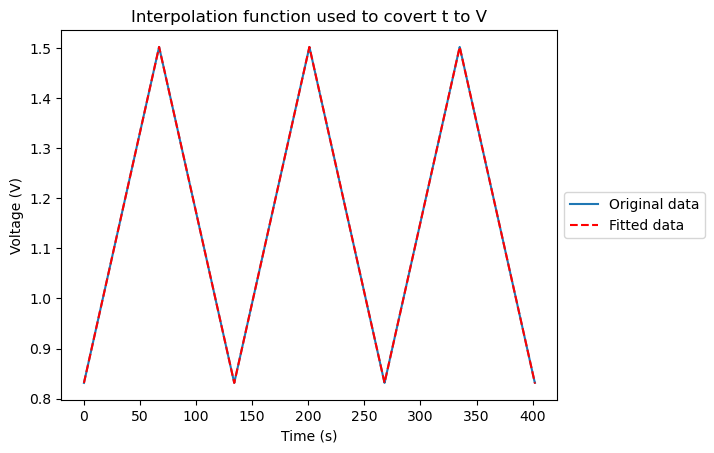

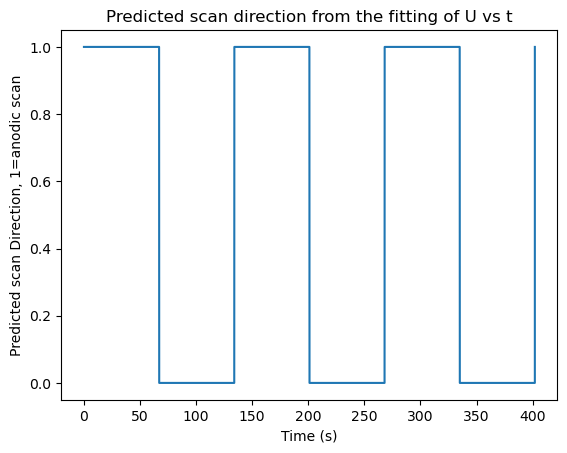

In [3]:
# get in the first spectral object which is for the bentham light source
SpEC1 = sp.SpEC()
SpEC1.read_CV(CV_path)
SpEC1.generate_interpolation_function(starting_offset=0.8)
SpEC1.read_Andorspec(AndorPath)
SpEC1.Calibrate_Andorspec()
SpEC1.populate_spec_scans()
SpEC1.populate_CV_scans()
SpEC1.Downsample_spec_scans(0.005, 1)
test, ref =sp.calculateDOD(SpEC1, 0, 'Cathodic', -1,11)

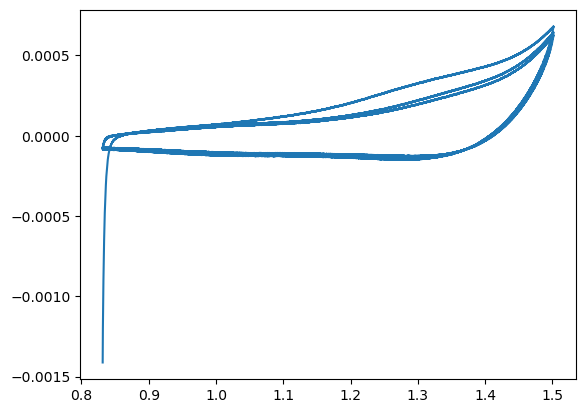

In [4]:
data=SpEC1.CV

# plot the second and third collumns of the data

plt.plot(data.iloc[:,1], data.iloc[:,2])

(6701, 2)


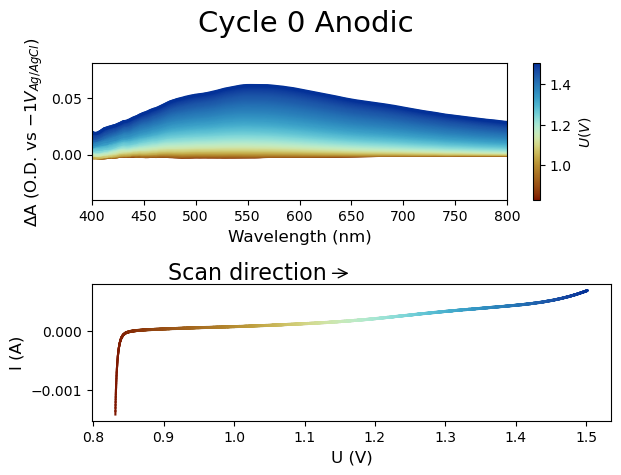

(6700, 2)


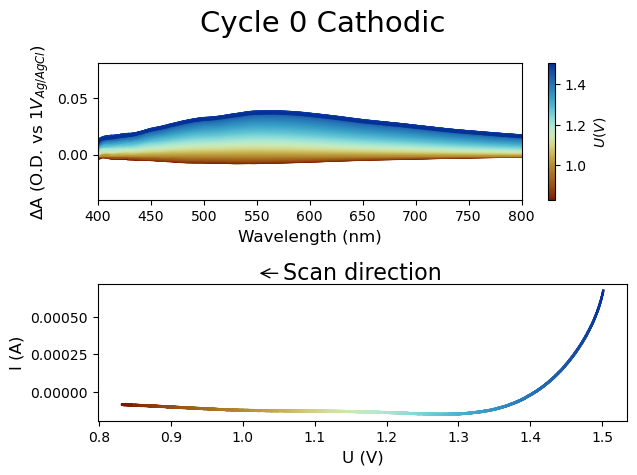

(6700, 2)


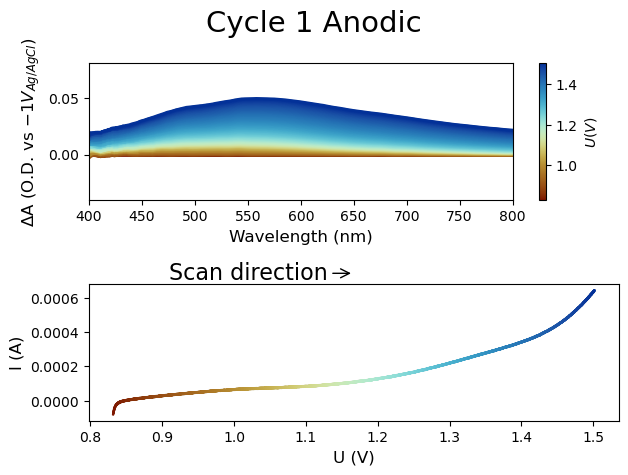

(6700, 2)


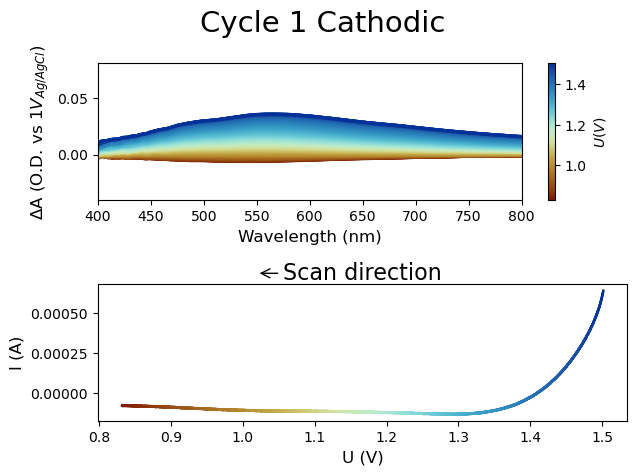

(6700, 2)


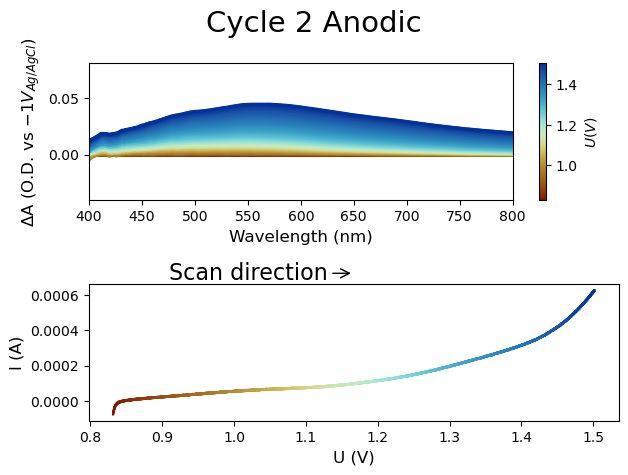

(6700, 2)


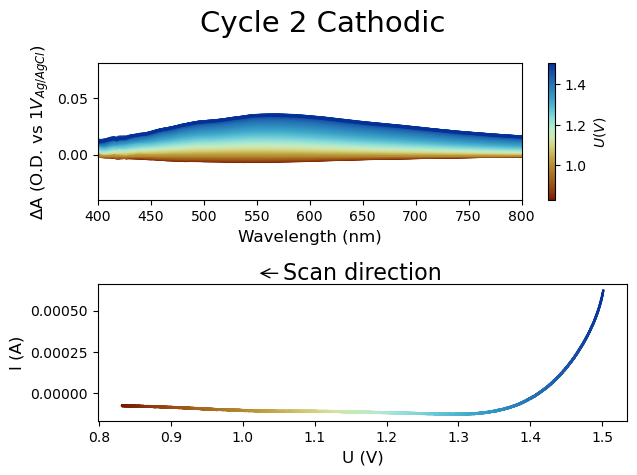

In [5]:
output_dir = 'Plots'
full_output_path = os.path.join(AndorPath.parent, output_dir)
os.makedirs(full_output_path, exist_ok=True)

for key, value in SpEC1.CV_scans.items():

        for key2, value2 in value.items():
            CV=SpEC1.CV_scans[key][key2]
            if key2 == 'Anodic':
                test, ref =sp.calculateDOD(SpEC1, key, key2, -1, 21)
            elif key2 == 'Cathodic':
                test, ref =sp.calculateDOD(SpEC1, key, key2, 1, 21)
            sp.Co_plot_DOD_and_CV(test,
                                   CV,
                                     Title=f'Cycle {key} {key2}',
                                       y_max=0.08, y_min=-0.04,
                                         x_min=400, x_max=800,
                                           reference_potential=f"$ {ref}V_{{Ag/AgCl}}$",
                                             scan_direction=key2,
                                               cmap_option=cmc.roma)
            #plt.savefig(os.path.join(full_output_path, f'Cycle_{key}_{key2}.png'))
            plt.close() 

(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='Wavelength (nm)', ylabel='$\\Delta$A (O.D. vs $ 0.83V_{Ag/AgCl}$)'>)

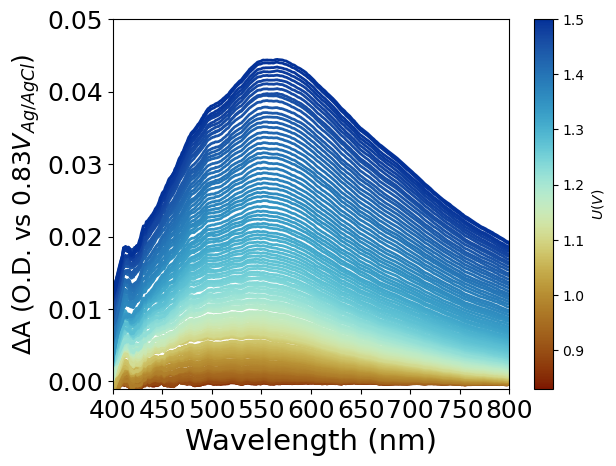

In [14]:
data, ref=sp.calculateDOD(SpEC1, 2, 'Anodic', 0.83, 21)
sp.plot_DOD(data, y_max=0.05, y_min=-0.001, x_min=400, x_max=800, reference_potential=f"$ {ref}V_{{Ag/AgCl}}$")